In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [18]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [19]:
print(df['host_name'].value_counts())
print(' ')
print(df['neighbourhood_group'].value_counts())
print(' ')
print(df['neighbourhood'].value_counts())
print(' ')
print(df['room_type'].value_counts())

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
               ... 
Gerceida          1
Dd                1
Sercan            1
Falana            1
Yarimar           1
Name: host_name, Length: 11452, dtype: int64
 
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
 
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Richmondtown             1
Fort Wadsworth           1
Willowbrook              1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64
 
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [20]:
missing = df.notnull()

for col in missing.columns:
    print(col)
    print(missing[col].value_counts())
    print(' ')

id
True    48895
Name: id, dtype: int64
 
name
True     48879
False       16
Name: name, dtype: int64
 
host_id
True    48895
Name: host_id, dtype: int64
 
host_name
True     48874
False       21
Name: host_name, dtype: int64
 
neighbourhood_group
True    48895
Name: neighbourhood_group, dtype: int64
 
neighbourhood
True    48895
Name: neighbourhood, dtype: int64
 
latitude
True    48895
Name: latitude, dtype: int64
 
longitude
True    48895
Name: longitude, dtype: int64
 
room_type
True    48895
Name: room_type, dtype: int64
 
price
True    48895
Name: price, dtype: int64
 
minimum_nights
True    48895
Name: minimum_nights, dtype: int64
 
number_of_reviews
True    48895
Name: number_of_reviews, dtype: int64
 
last_review
True     38843
False    10052
Name: last_review, dtype: int64
 
reviews_per_month
True     38843
False    10052
Name: reviews_per_month, dtype: int64
 
calculated_host_listings_count
True    48895
Name: calculated_host_listings_count, dtype: int64
 
availability_365
T

In [21]:
for i in df['number_of_reviews']: 
    if i == 0:
        df['reviews_per_month'].fillna(0, inplace=True)

In [22]:
fig = px.box(df,x="price")
fig.update_layout(width=1000, height=300)
fig.show()

In [23]:
fig = px.box(df,x="minimum_nights")
fig.update_layout(width=1000, height=300)
fig.show()

In [24]:
fig = px.box(df,x="number_of_reviews")
fig.update_layout(width=1000, height=300)
fig.show()

In [25]:
fig = px.box(df,x="reviews_per_month")
fig.update_layout(width=1000, height=300)
fig.show()

In [26]:
df.rename(columns={'neighbourhood_group':'city',
                   'neighbourhood':'neighborhood'}, inplace=True)

In [27]:
df.drop(df[df['price'] >= 400].index, inplace = True) 
df.drop(df[df['minimum_nights'] >= 12].index, inplace = True) 
df.drop(df[df['number_of_reviews'] >= 69].index, inplace = True) 
df.drop(df[df['reviews_per_month'] >= 4.64].index, inplace = True) 

In [29]:
df['price_range'] = np.nan

for col in [df]:
    col.loc[(col['price'] >= 0) & (col['price'] <= 99), 'price_range'] = '0 to 99'
    col.loc[(col['price'] >= 100) & (col['price'] <= 199), 'price_range'] = '100 to 199'
    col.loc[(col['price'] >= 200) & (col['price'] <= 299), 'price_range'] = '200 to 299'
    col.loc[(col['price'] >= 300) & (col['price'] <= 399), 'price_range'] = '300 to 399'

# REORDER COLUMNS
cols = ['id', 'name', 'host_id', 'host_name', 'city', 'neighborhood',
       'latitude', 'longitude', 'room_type', 'price', 'price_range',
       'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']  
df = df[cols]

In [30]:
df.head()

id                                              name  host_id  \
0   2539                Clean & quiet apt home by the park     2787   
1   2595                             Skylit Midtown Castle     2845   
2   3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
4   5022  Entire Apt: Spacious Studio/Loft by central park     7192   
10  5295                  Beautiful 1br on Upper West Side     7702   

    host_name       city     neighborhood  latitude  longitude  \
0        John   Brooklyn       Kensington  40.64749  -73.97237   
1    Jennifer  Manhattan          Midtown  40.75362  -73.98377   
2   Elisabeth  Manhattan           Harlem  40.80902  -73.94190   
4       Laura  Manhattan      East Harlem  40.79851  -73.94399   
10       Lena  Manhattan  Upper West Side  40.80316  -73.96545   

          room_type  price price_range  minimum_nights  number_of_reviews  \
0      Private room    149  100 to 199               1                  9   
1   Entire home/apt    225  200 to 299               1                 45   
2      Private room    150  100 to 199               3                  0   
4   Entire home/apt     80     0 to 99              10                  9   
10  Entire home/apt    135  100 to 199               5                 53   

   last_review  reviews_per_month  calculated_host_listings_count  \
0   2018-10-19               0.21                               6   
1   2019-05-21               0.38                               2   
2          NaN               0.00                               1   
4   2018-11-19               0.10                               1   
10  2019-06-22               0.43                               1   

    availability_365  
0                365  
1                355  
2                365  
4                  0  
10                 6

In [32]:
df.shape

(34708, 17)

Text(0.5, 1.0, 'VARIABLE CORRELATION MATRIX')

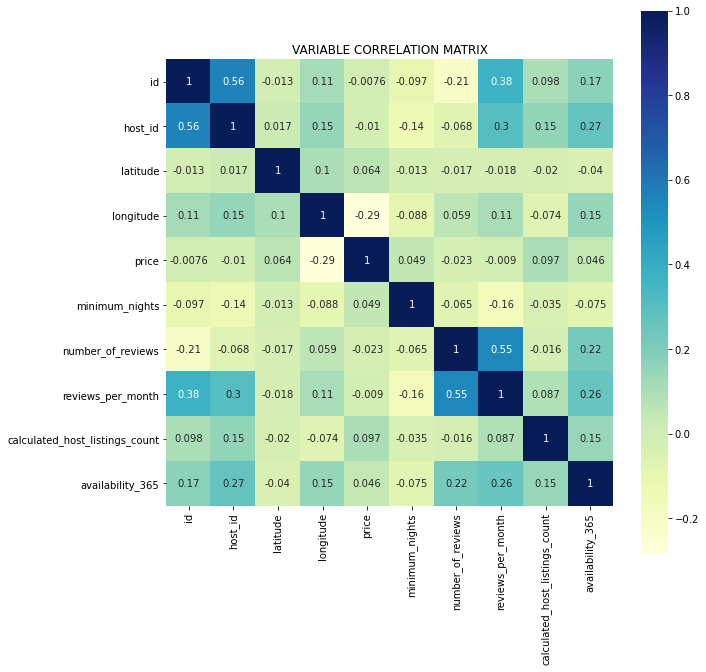

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar = True,  square = True, annot=True, cmap= 'YlGnBu')
plt.title('VARIABLE CORRELATION MATRIX')

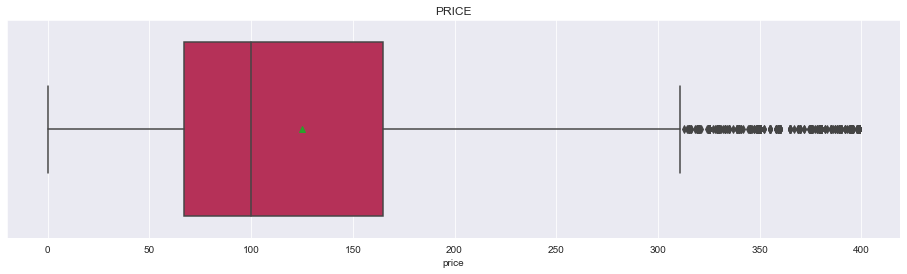

In [34]:
plt.figure(figsize=(16, 4))
sns.set_style("darkgrid")
ax = sns.boxplot(x="price", data=df, showmeans=True, palette='rocket')
plt.title('PRICE')
plt.show()

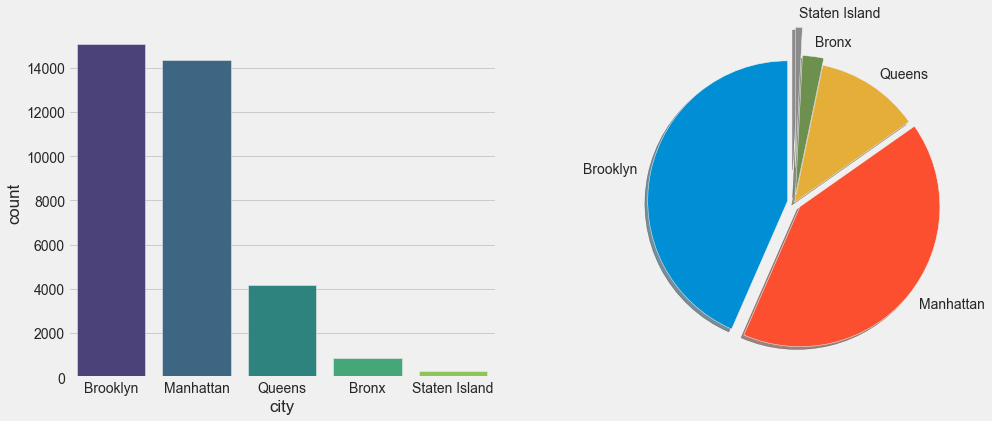

In [37]:
#CREATE A DATAFRAME WITH A COUNT OF EACH CITY
city = df.groupby(['city'])[['id']].count()
city.reset_index(inplace=True)
city.rename(columns={'id':'count'}, inplace=True)
city.sort_values(by='count', ascending=False, inplace=True)

#CREATE BARCHART AND PIE CHART FOR CITY VALUES
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='city',y='count', data=city, palette='viridis')


plt.subplot(1,2,2)
plt.pie(city['count'], explode=[0.05,0.05,0,0.05,0.25], labels=city['city'], shadow=True, startangle=90)

plt.show()

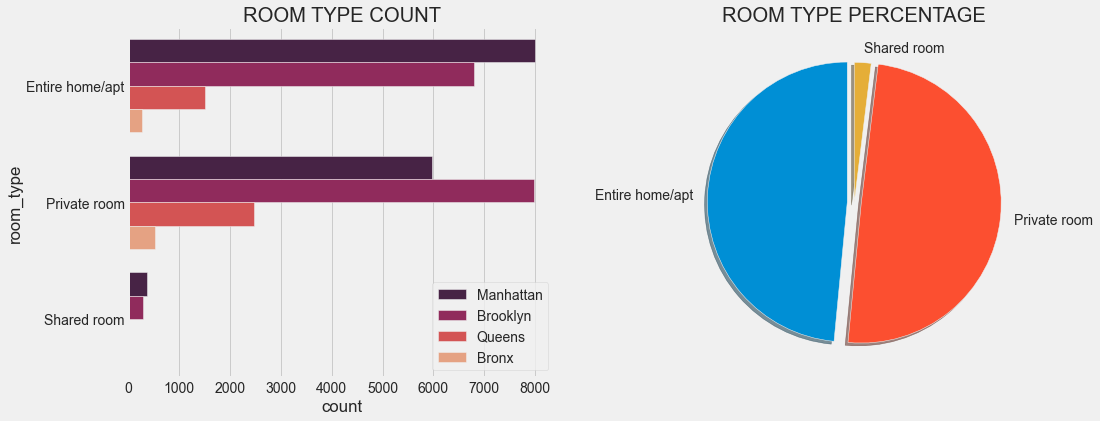

In [38]:
room_type = df.groupby(['city', 'room_type'])[['id']].count()
room_type.reset_index(inplace=True)
room_type.rename(columns={'id':'count'}, inplace=True)
room_type = room_type.sort_values(by='count', ascending=False)[:10]

room_totals = room_type.groupby(['room_type'])[['count']].sum()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='count',y='room_type', hue='city', data=room_type, palette='rocket')
plt.legend(loc='lower right')
plt.title('ROOM TYPE COUNT')

plt.subplot(1,2,2)
plt.pie(room_totals['count'], explode=[0.05,0.05,0], labels=room_totals.index, shadow=True, startangle=90)

plt.title('ROOM TYPE PERCENTAGE')
plt.show()

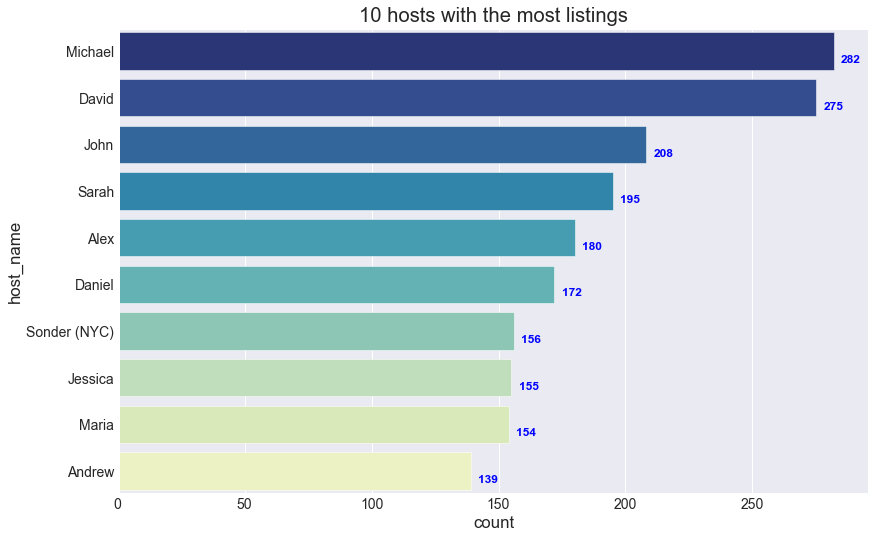

In [42]:
host = df.groupby(['host_name'])[['host_id']].count()
host.reset_index(inplace=True)
host.rename(columns={'host_id':'count'}, inplace=True)
host = host.sort_values(by=['count'], ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x='count',y='host_name', data=host, palette='YlGnBu_r')
for i, v in enumerate(host['count']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontsize=12, fontweight='bold')
plt.title('10 hosts with the most listings')
plt.show()

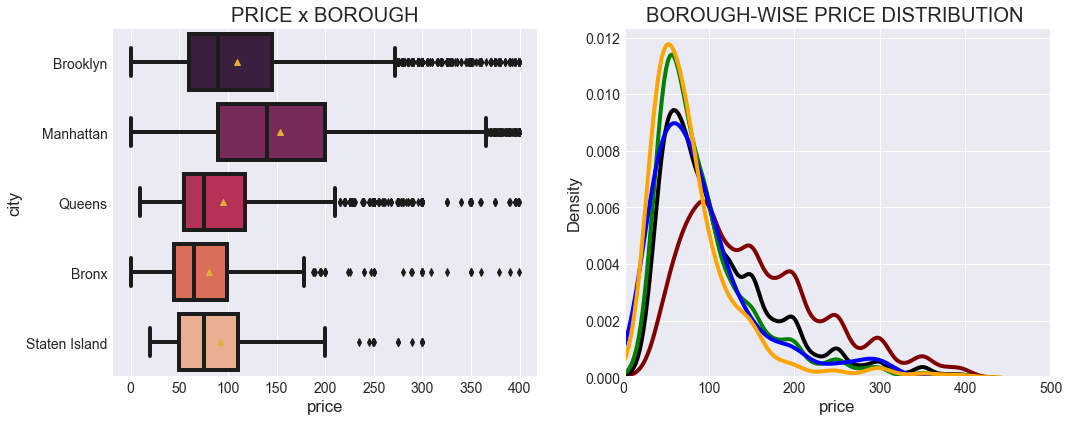

In [47]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax = sns.boxplot(x="price", y="city", data=df, showmeans=True, palette='rocket')
plt.title('PRICE x BOROUGH')

plt.subplot(1,2,2)
sns.kdeplot(df[df.city=='Manhattan'].price,color='maroon',label='Manhattan')
sns.kdeplot(df[df.city=='Brooklyn'].price,color='black',label='Brooklyn')
sns.kdeplot(df[df.city=='Queens'].price,color='green',label='Queens')
sns.kdeplot(df[df.city=='Staten Island'].price,color='blue',label='Staten Island')
sns.kdeplot(df[df.city=='Bronx'].price,color='orange',label='Bronx')
plt.title('BOROUGH-WISE PRICE DISTRIBUTION ')
plt.xlim(0,500)

plt.show()

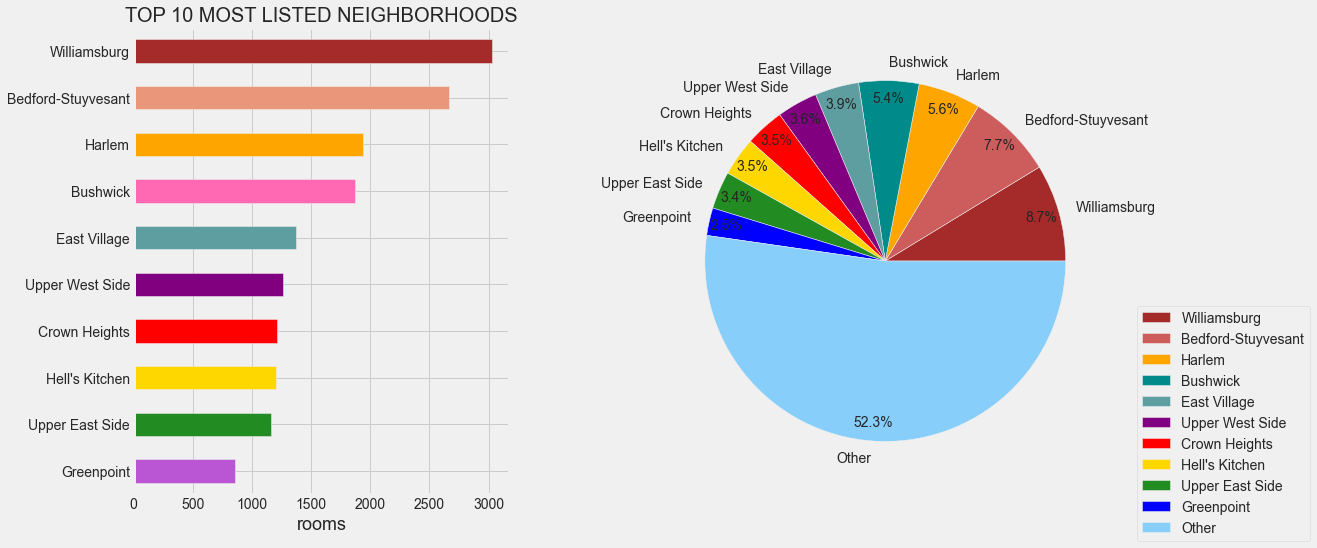

In [48]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))

clr = ("mediumorchid", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.neighborhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("TOP 10 MOST LISTED NEIGHBORHOODS",size=20)
ax[0].set_xlabel('rooms',size=18)


neigh_count=df['neighborhood'].value_counts()
neigh_names=list(df['neighborhood'].value_counts().index)[:10]
counts=list(neigh_count[:10])
counts.append(neigh_count.agg(sum)-neigh_count[:10].agg('sum'))
neigh_names.append('Other')

type_dict=pd.DataFrame({"group":neigh_names,"counts":counts})
clr1=('brown','indianred','orange','darkcyan','cadetblue','purple','red','gold','forestgreen','blue','lightskyblue')
qx = type_dict.plot(kind='pie', y='counts', labels=neigh_names,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])

plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass